downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


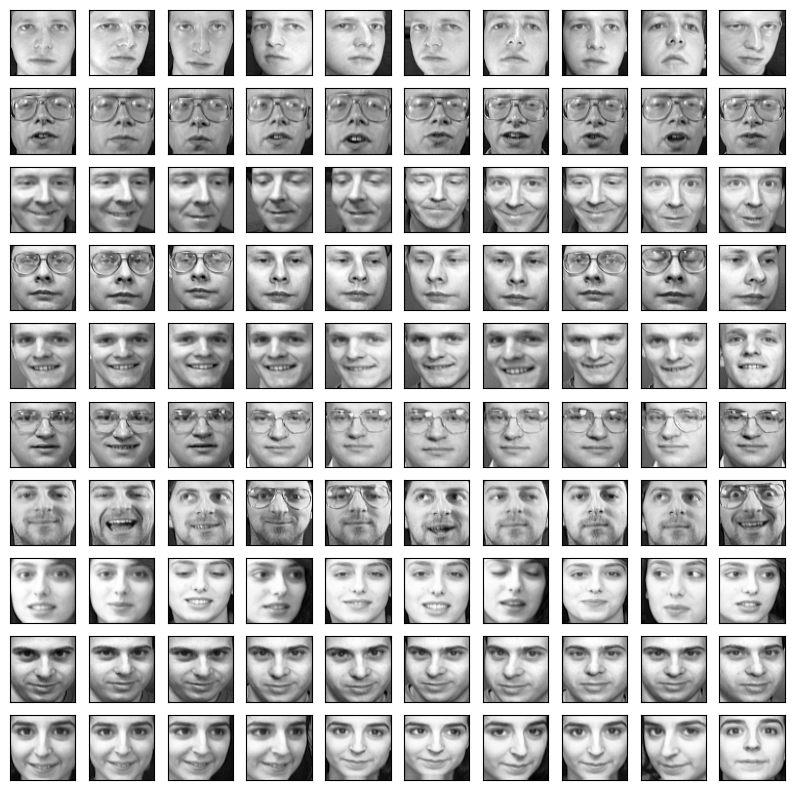

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# Load the dataset
faces, _ = datasets.fetch_olivetti_faces(return_X_y=True, shuffle=False)

# Plot all faces
fig, axes = plt.subplots(10, 10, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i].reshape(64, 64), cmap='gray')
plt.show()


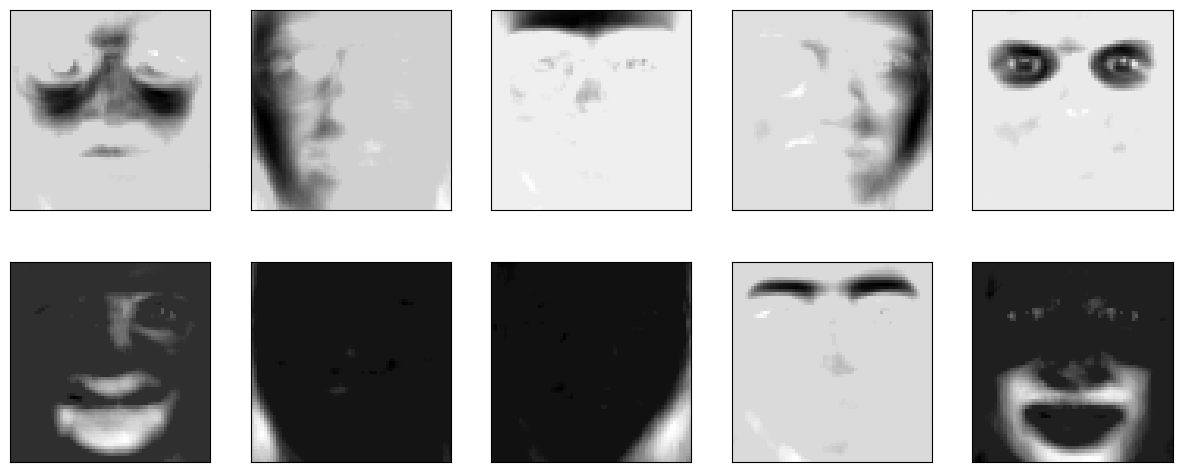

Number of non-zero values for alpha=3: [1511 1707  832 1548  901 1153  400  644  675 1451]


In [2]:
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
faces_scaled = scaler.fit_transform(faces)

# Fit Sparse PCA with alpha=3
spca_3 = SparsePCA(n_components=10, alpha=3, random_state=0)
spca_3.fit(faces_scaled)

# Plot the principal components
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(spca_3.components_[i].reshape(64, 64), cmap='gray')
plt.show()

# Count non-zero values in each component
non_zero_3 = np.count_nonzero(spca_3.components_, axis=1)
print("Number of non-zero values for alpha=3:", non_zero_3)

# Optionally fit Sparse PCA with alpha=1 if it doesn't take too long
# Uncomment the following lines if needed

# spca_1 = SparsePCA(n_components=10, alpha=1, random_state=0)
# spca_1.fit(faces_scaled)

# Plot the principal components for alpha=1
# fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
# for i, ax in enumerate(axes.flat):
#     ax.imshow(spca_1.components_[i].reshape(64, 64), cmap='gray')
# plt.show()

# Count non-zero values in each component for alpha=1
# non_zero_1 = np.count_nonzero(spca_1.components_, axis=1)
# print("Number of non-zero values for alpha=1:", non_zero_1)


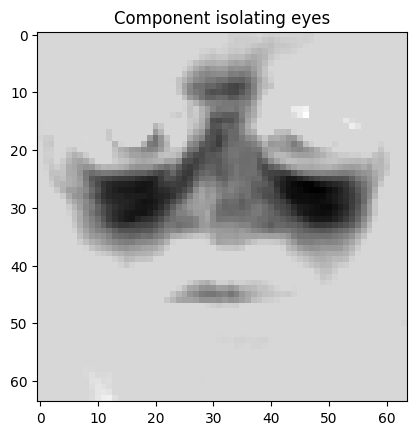

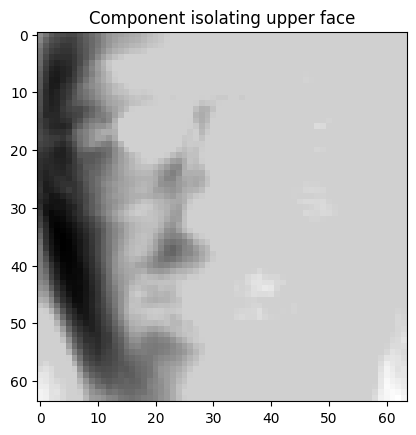

In [3]:
# To isolate eyes or extract lower/upper parts, we need to analyze the components
# Usually, specific components will correspond to certain features
# Here we provide an example of how to visualize and interpret the components

# Example for isolating eyes (typically involves analyzing the components visually)
eyes_component = spca_3.components_[0]  # Assuming the first component isolates eyes
plt.imshow(eyes_component.reshape(64, 64), cmap='gray')
plt.title("Component isolating eyes")
plt.show()

# Similarly, for lower or upper parts of the face
upper_face_component = spca_3.components_[1]  # Assuming the second component isolates upper face
plt.imshow(upper_face_component.reshape(64, 64), cmap='gray')
plt.title("Component isolating upper face")
plt.show()


In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Manually denoted glasses labels
which_glasses = np.repeat(np.array([1, 5, 13, 26, 27, 30, 33, 36]), 10)
which_glasses_bool = np.zeros((40, 10))
which_glasses_bool[np.array([1, 5, 13, 26, 27, 30, 33, 36]), :] = 1
which_glasses_bool[3, [0, 1, 2, 7, 8]] = 1
which_glasses_bool[6, [3, 4, 9]] = 1
which_glasses_bool[12, [0, 1, 4, 5, 6, 7, 8, 9]] = 1
which_glasses_bool[16, [0, 1, 4, 5, 6, 7, 8, 9]] = 1
which_glasses_bool[18, [0, 1, 2, 5, 9]] = 1
which_glasses_bool[19, [0, 1, 2, 4, 6, 7, 8, 9]] = 1
which_glasses_bool[35, [8, 9]] = 1
which_glasses_bool = which_glasses_bool.flatten()

# Transform the dataset using Sparse PCA
components_spca = spca_3.transform(faces_scaled)

# Fit logistic regression to predict glasses using the Sparse PCA components
model = LogisticRegression(max_iter=1000)
model.fit(components_spca, which_glasses_bool)

# Identify the most predictive components
predictive_components = np.argsort(np.abs(model.coef_))[0, ::-1]

# Output the two most predictive components
most_predictive = predictive_components[:2]
print("Most predictive components for glasses:", most_predictive)


Most predictive components for glasses: [2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


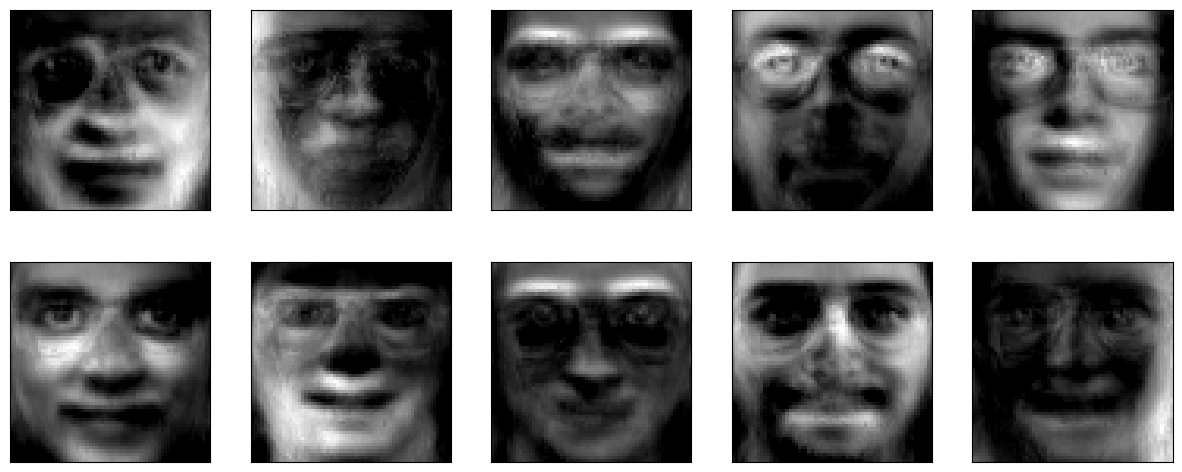

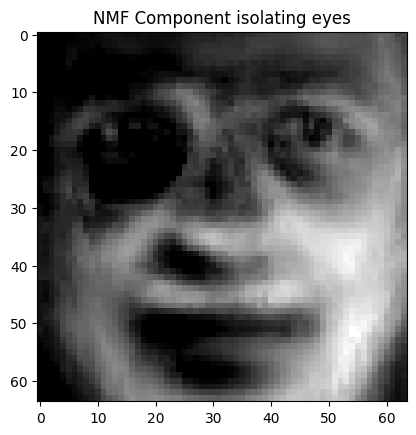

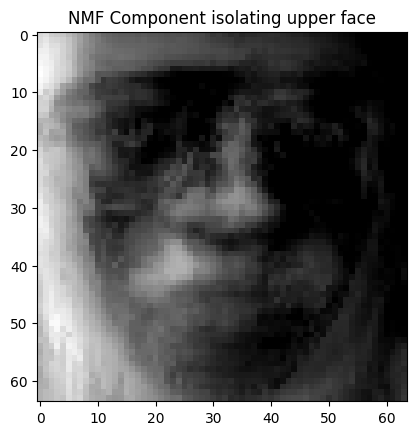

In [6]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to the dataset
scaler = MinMaxScaler()
faces_scaled = scaler.fit_transform(faces)
# Fit NMF to the dataset
nmf = NMF(n_components=10, random_state=0)
W = nmf.fit_transform(faces_scaled)
H = nmf.components_

# Plot the principal components
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(H[i].reshape(64, 64), cmap='gray')
plt.show()

# Similar analysis for eyes and upper/lower parts as done for Sparse PCA
eyes_component_nmf = H[0]  # Assuming the first component isolates eyes
plt.imshow(eyes_component_nmf.reshape(64, 64), cmap='gray')
plt.title("NMF Component isolating eyes")
plt.show()

upper_face_component_nmf = H[1]  # Assuming the second component isolates upper face
plt.imshow(upper_face_component_nmf.reshape(64, 64), cmap='gray')
plt.title("NMF Component isolating upper face")
plt.show()


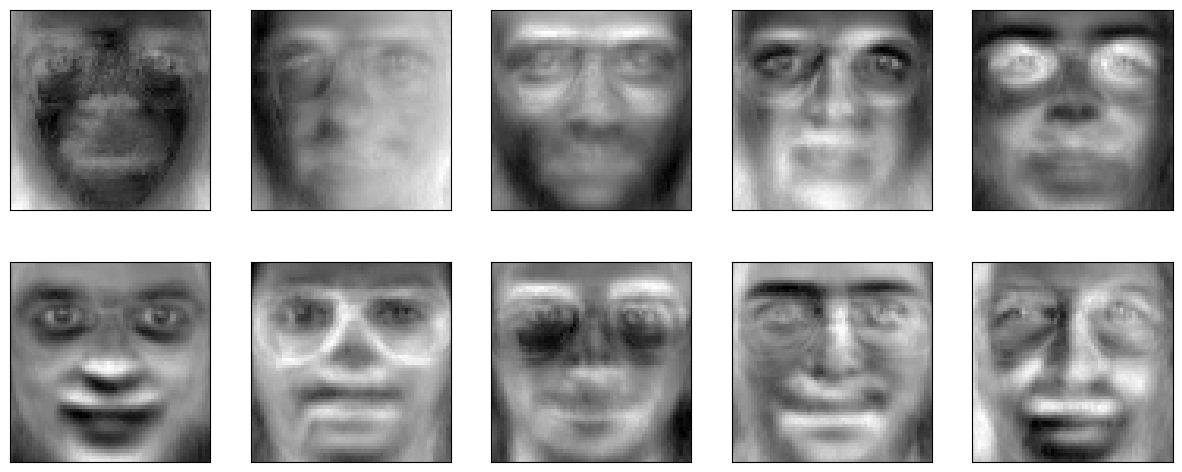

In [7]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=10)
pca.fit(faces_scaled)

# Plot the principal components
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
plt.show()

# Compare results by visual inspection and by the number of non-zero components
# We should observe that Sparse PCA leads to more sparse components compared to PCA and NMF
